#XGBOOST Regression

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import mannwhitneyu

In [100]:
def model(x_train,y_train):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
  xgb_model = xgboost.XGBRegressor(n_estimators=100, 
                                    learning_rate=0.2, 
                                    gamma=0,
                                    subsample=0.5,
                                    colsample_bytree=0.5, 
                                    max_depth=5)
    
  xgb_results = xgb_model.fit(x_train,y_train, verbose=True)
  y_pred = xgb_results.predict(x_test)
  return xgb_model, y_test, y_pred

In [101]:
# Mann-Whitney U test
#The function check diference between predicted times to real times
def checkDiff(dt, dt2,cntSame,cntDiff):
  data1 = dt
  data2 = dt2
  # compare samples
  stat, p = mannwhitneyu(data1, data2)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    cntSame = cntSame + 1
    #print('Same distribution (fail to reject H0)')
  else:
    cntDiff = cntDiff + 1
    #print('Different distribution (reject H0)')
  return cntSame, cntDiff

In [102]:
#Load final file with all data
dfbus = pd.read_excel('final_reg.xls', index_col=0)
dfbus = dfbus.join(pd.get_dummies(dfbus['WeekDay']))
dfbus

,WeekDay,Hours,SecMin,Line,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,Mon,Sun,Thu,Tue,Wed
0,Sun,9,0,921,199,285,325,478,557,620,683,783,858,923,969,1028,0,1,0,0,0
1,Sun,9,0,921,208,295,335,486,565,625,689,788,863,929,975,1031,0,1,0,0,0
2,Sun,9,0,921,198,300,340,492,571,634,698,800,873,935,979,1025,0,1,0,0,0
3,Sun,9,0,921,210,306,346,497,571,631,695,797,874,938,984,1037,0,1,0,0,0
4,Sun,9,0,921,209,316,356,520,595,653,719,821,897,961,1006,1066,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Tue,18,600,921,214,376,399,485,533,561,624,720,766,804,831,852,0,0,0,1,0
1576,Tue,18,2400,921,185,310,348,412,448,480,535,641,688,757,769,789,0,0,0,1,0
1577,Tue,19,600,921,203,323,363,415,487,508,630,711,763,827,849,863,0,0,0,1,0
1578,Tue,20,1200,921,218,338,366,421,470,500,537,634,689,734,763,782,0,0,0,1,0


#Model from station o2 to o13

In [103]:
###In this section "Model from station o2 to o13" we created for each station model, we used same model for each station
#each station(model) have linear graph and RMSE,Rsqure,MSE, 
#each model have difference between predicted and actual data(Min,Max,Std,Mean)
#The main idea of the final model we are looking all times to previus station time and each station have previus station time
#model looks like cascade conection.

**station o2**

In [104]:
#x = dfbus[['Hours','SecMin','Line']].values
x = dfbus[['Hours','SecMin','Line','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o2'].values
hour = 16
minSec = 45*60
line = 921
weekDay = [0,0,1,0,0]

#hour = 11
#minSec = 25*60
#line = 921
#weekDay = [0,0,1,0,0]

In [105]:
model_o2, y_test, y_pred = model(x,y)
#arr = [hour,minSec,line]
arr = [hour,minSec,line,weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
arr = np.array(arr).reshape((1,-1))
o2 = model_o2.predict(np.array(arr).reshape((1,-1)))
print(o2)

[12:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[256.3593]


In [106]:
r2_score(y_test,y_pred)

0.39161283208927566

In [107]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 1461.93
RMSE: 38.24


In [108]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,206,201.479706,4.520294
1,201,209.218185,-8.218185
2,212,211.414169,0.585831
3,192,203.589706,-11.589706
4,364,350.124481,13.875519
...,...,...,...
311,213,194.188080,18.811920
312,183,198.770477,-15.770477
313,209,201.189957,7.810043
314,215,204.340286,10.659714


In [109]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -202.69488525390625
Maximum:  196.74514770507812
Average:  23.847632058059112
STD:  38.2896332284184


Text(0.5, 1.0, 'Actual vs Predicted')

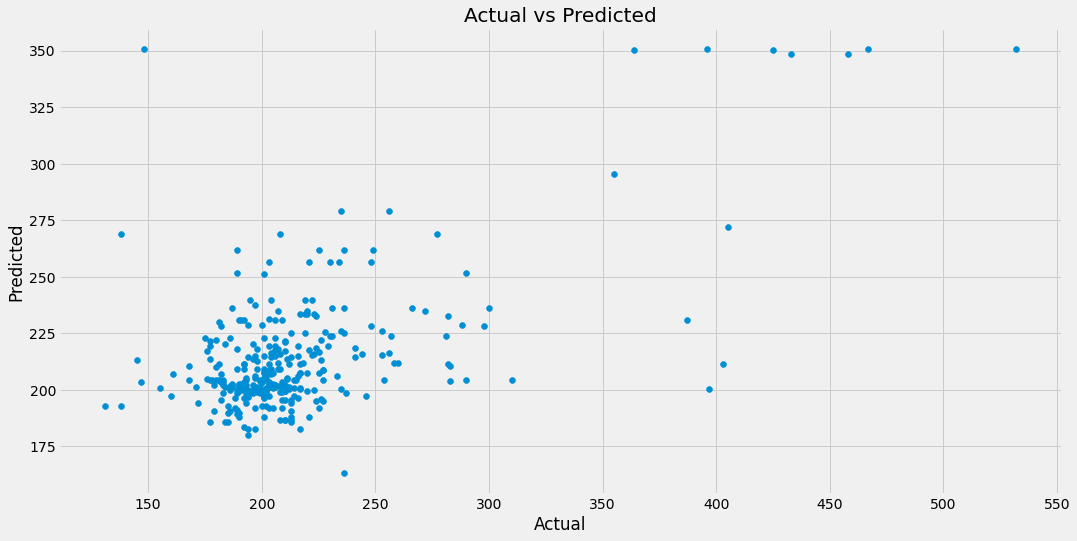

In [110]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o3**

In [111]:
#x = dfbus[['Hours','SecMin','Line','o2']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o3'].values

In [112]:
model_o3, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0]]
arr = np.array(arr).reshape((1,-1))
o3 = model_o3.predict(np.array(arr).reshape((1,-1)))
print(o3)

[12:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[416.53943]


In [113]:
r2_score(y_test,y_pred)

0.7370624193486472

In [114]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 1103.09
RMSE: 33.21


In [115]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,288,290.814087,-2.814087
1,290,286.153992,3.846008
2,286,284.531311,1.468689
3,275,271.124329,3.875671
4,486,496.443817,-10.443817
...,...,...,...
311,296,289.227905,6.772095
312,264,268.890991,-4.890991
313,302,317.032959,-15.032959
314,300,297.473053,2.526947


In [116]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -116.62811279296875
Maximum:  168.3177490234375
Average:  22.501995859266838
STD:  33.222334449859055


Text(0.5, 1.0, 'Actual vs Predicted')

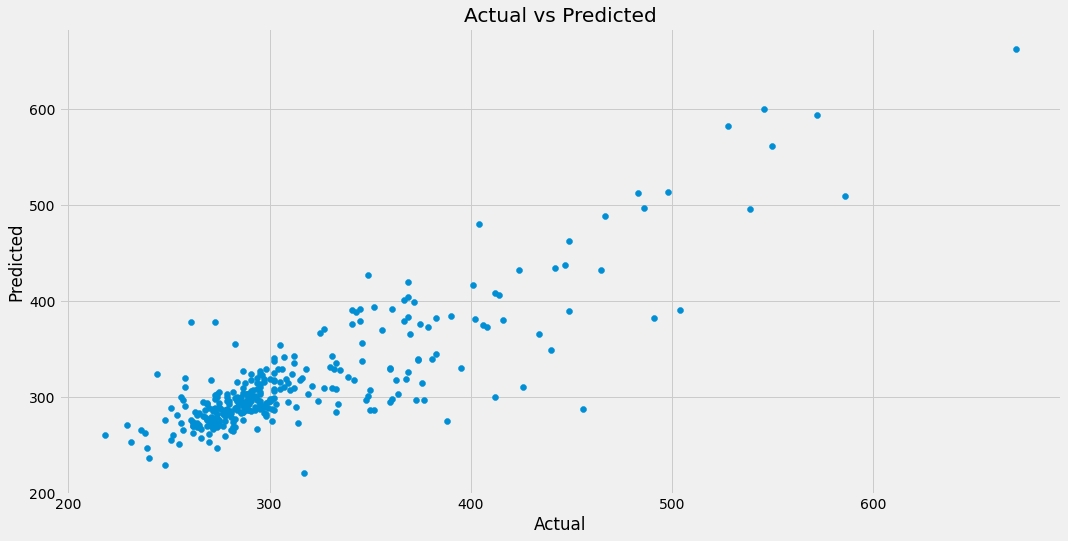

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o4**

In [118]:
#x = dfbus[['Hours','SecMin','Line','o2','o3']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o4'].values

In [119]:
model_o4, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0]]
arr = np.array(arr).reshape((1,-1))
o4 = model_o4.predict(np.array(arr).reshape((1,-1)))
print(o4)

[12:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[451.46375]


In [120]:
r2_score(y_test,y_pred)

0.8953038276350113

In [121]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 536.84
RMSE: 23.17


In [122]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,328,326.313446,1.686554
1,330,332.293701,-2.293701
2,327,327.667633,-0.667633
3,315,313.167389,1.832611
4,528,534.440369,-6.440369
...,...,...,...
311,335,339.560516,-4.560516
312,305,301.337341,3.662659
313,342,336.588501,5.411499
314,372,347.301117,24.698883


In [123]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -112.89471435546875
Maximum:  136.33526611328125
Average:  12.303487174118622
STD:  23.198677692808918


Text(0.5, 1.0, 'Actual vs Predicted')

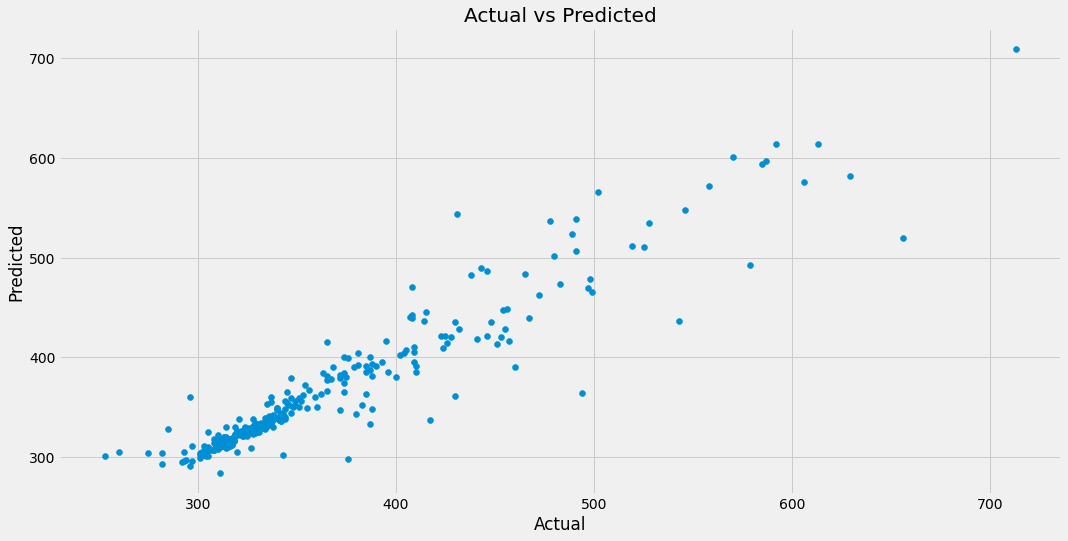

In [124]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o5**

In [125]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o5'].values

In [126]:
model_o5, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0]]
arr = np.array(arr).reshape((1,-1))
o5 = model_o5.predict(np.array(arr).reshape((1,-1)))
print(o5)

[12:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[628.2341]


In [127]:
r2_score(y_test,y_pred)

0.903693070841679

In [128]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 579.37
RMSE: 24.07


In [129]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,480,480.400940,-0.400940
1,479,477.004822,1.995178
2,482,475.639160,6.360840
3,463,455.728882,7.271118
4,702,687.009399,14.990601
...,...,...,...
311,478,481.633392,-3.633392
312,453,442.147095,10.852905
313,492,485.329590,6.670410
314,425,452.988373,-27.988373


In [130]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -69.30523681640625
Maximum:  90.1597900390625
Average:  15.957339999041979
STD:  23.893658704668916


Text(0.5, 1.0, 'Actual vs Predicted')

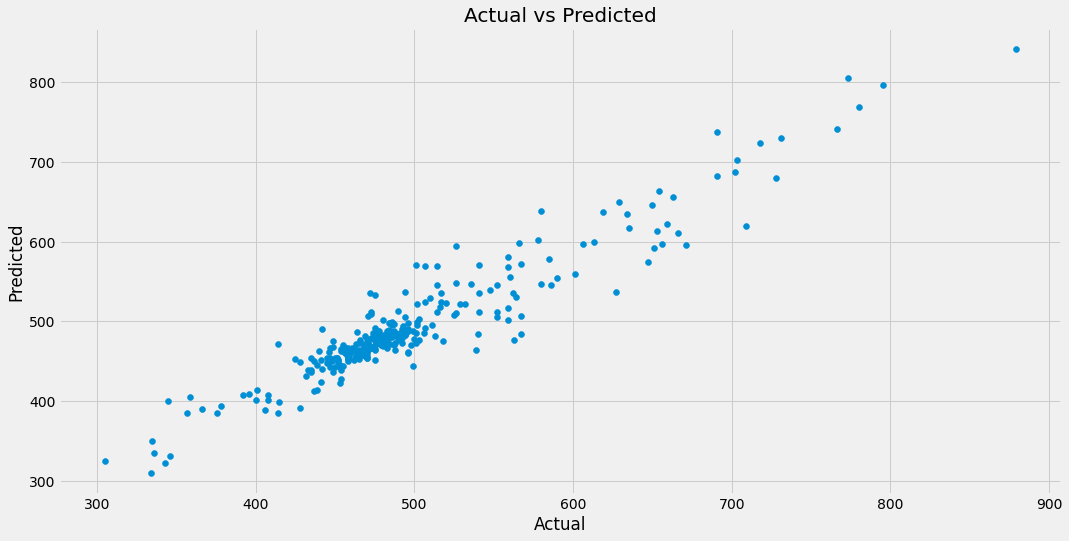

In [131]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o6**


In [132]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o6'].values

In [133]:
model_o6, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0]]
arr = np.array(arr).reshape((1,-1))
o6 = model_o6.predict(np.array(arr).reshape((1,-1)))
print(o6)

[12:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[757.937]


In [134]:
r2_score(y_test,y_pred)

0.8958878071285229

In [135]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 1002.33
RMSE: 31.66


In [136]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,552,551.866333,0.133667
1,565,567.812134,-2.812134
2,563,555.121521,7.878479
3,538,538.074890,-0.074890
4,774,842.079041,-68.079041
...,...,...,...
311,551,554.665344,-3.665344
312,525,529.480896,-4.480896
313,588,585.746216,2.253784
314,485,472.672272,12.327728


In [137]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -91.35638427734375
Maximum:  184.4503173828125
Average:  18.091583445102355
STD:  31.62568494749876


Text(0.5, 1.0, 'Actual vs Predicted')

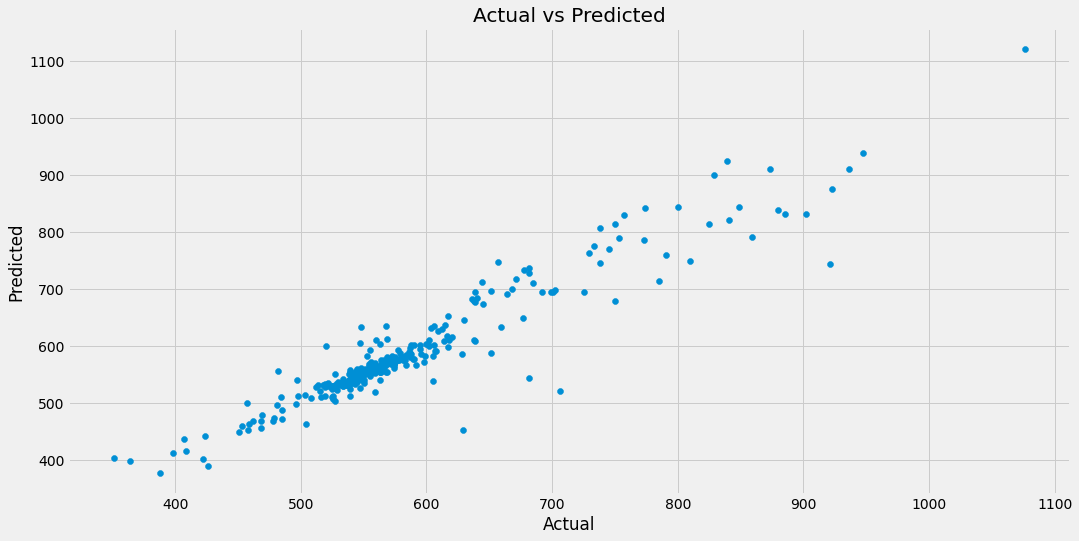

In [138]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o7**


In [139]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o7'].values

In [140]:
model_o7, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0]]
arr = np.array(arr).reshape((1,-1))
o7 = model_o7.predict(np.array(arr).reshape((1,-1)))
print(o7)

[12:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[865.5633]


In [141]:
r2_score(y_test,y_pred)

0.9457254717716204

In [142]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 627.69
RMSE: 25.05


In [143]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,607,620.668701,-13.668701
1,634,623.147400,10.852600
2,631,627.336670,3.663330
3,603,600.971436,2.028564
4,832,852.004211,-20.004211
...,...,...,...
311,610,612.896545,-2.896545
312,583,586.775452,-3.775452
313,649,662.962830,-13.962830
314,523,525.325684,-2.325684


In [144]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -169.3994140625
Maximum:  108.6690673828125
Average:  14.741832781441603
STD:  24.976637752812255


Text(0.5, 1.0, 'Actual vs Predicted')

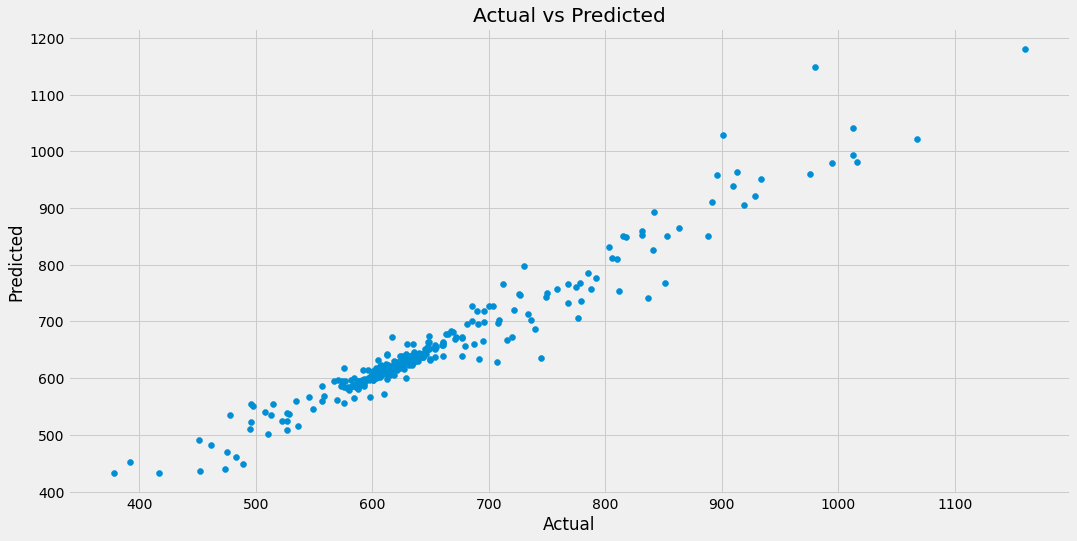

In [145]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o8**


In [146]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o8'].values

In [147]:
model_o8, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0]]
arr = np.array(arr).reshape((1,-1))
o8 = model_o8.predict(np.array(arr).reshape((1,-1)))
print(o8)

[12:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[937.84045]


In [148]:
r2_score(y_test,y_pred)

0.9782435833766681

In [149]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 265.78
RMSE: 16.30


In [150]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,675,668.675903,6.324097
1,698,699.409546,-1.409546
2,698,696.214478,1.785522
3,667,667.240662,-0.240662
4,897,892.408630,4.591370
...,...,...,...
311,675,674.360352,0.639648
312,648,649.923889,-1.923889
313,712,719.227234,-7.227234
314,590,596.125854,-6.125854


In [151]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -68.779052734375
Maximum:  136.591796875
Average:  9.056745601605765
STD:  16.243203764827435


Text(0.5, 1.0, 'Actual vs Predicted')

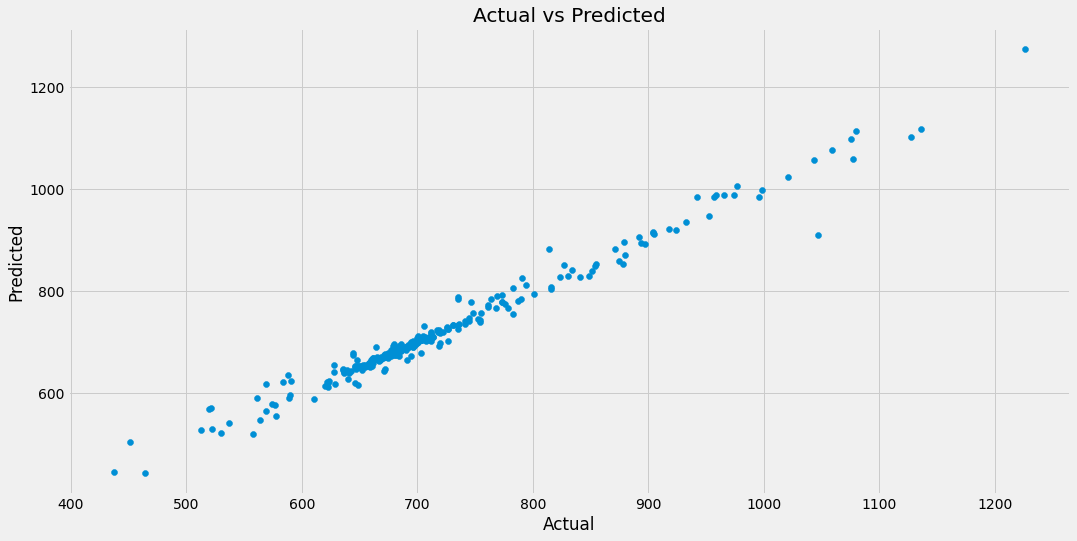

In [152]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o9**


In [153]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o9'].values

In [154]:
model_o9, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0]]
arr = np.array(arr).reshape((1,-1))
o9 = model_o9.predict(np.array(arr).reshape((1,-1)))
print(o9)

[12:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1031.2229]


In [155]:
r2_score(y_test,y_pred)

0.9834509468877772

In [156]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 214.32
RMSE: 14.64


In [157]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,778,776.584656,1.415344
1,803,802.081177,0.918823
2,802,799.980408,2.019592
3,767,764.451538,2.548462
4,1000,983.875061,16.124939
...,...,...,...
311,778,778.958923,-0.958923
312,748,751.400818,-3.400818
313,814,813.546814,0.453186
314,678,686.711121,-8.711121


In [158]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -71.21990966796875
Maximum:  49.611328125
Average:  8.932085254524328
STD:  14.341457992959345


Text(0.5, 1.0, 'Actual vs Predicted')

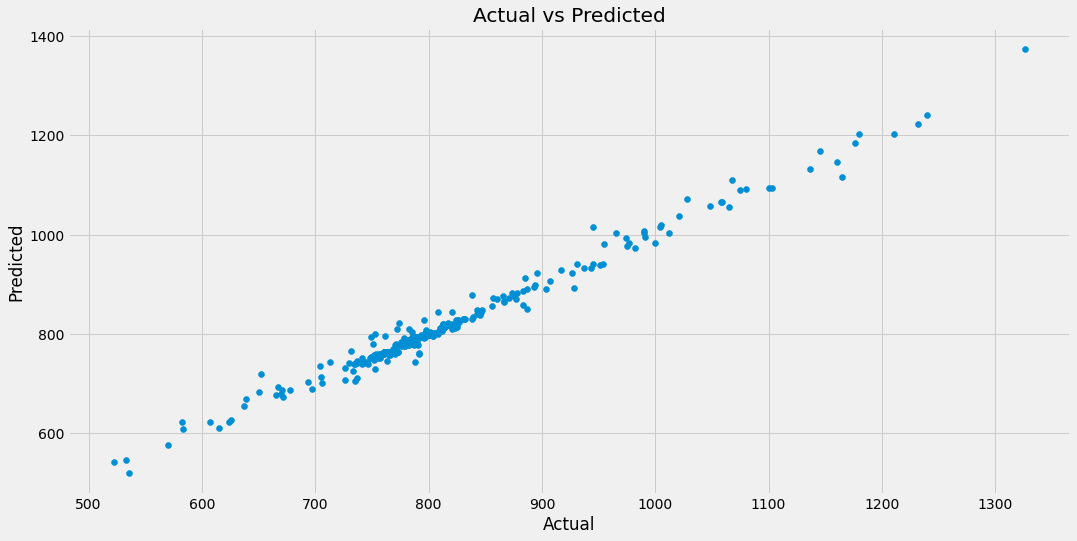

In [159]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o10**


In [160]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o10'].values

In [161]:
model_o10, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0]]
arr = np.array(arr).reshape((1,-1))
o10 = model_o10.predict(np.array(arr).reshape((1,-1)))
print(o10)

[12:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1106.8805]


In [162]:
r2_score(y_test,y_pred)

0.9839228475708618

In [163]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 214.61
RMSE: 14.65


In [164]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,854,846.612671,7.387329
1,878,877.823975,0.176025
2,878,875.800964,2.199036
3,840,840.746460,-0.746460
4,1073,1066.234253,6.765747
...,...,...,...
311,856,851.876953,4.123047
312,822,825.420227,-3.420227
313,890,882.066467,7.933533
314,784,754.352234,29.647766


In [165]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -139.619140625
Maximum:  60.62353515625
Average:  8.373969742014438
STD:  14.672580821792373


Text(0.5, 1.0, 'Actual vs Predicted')

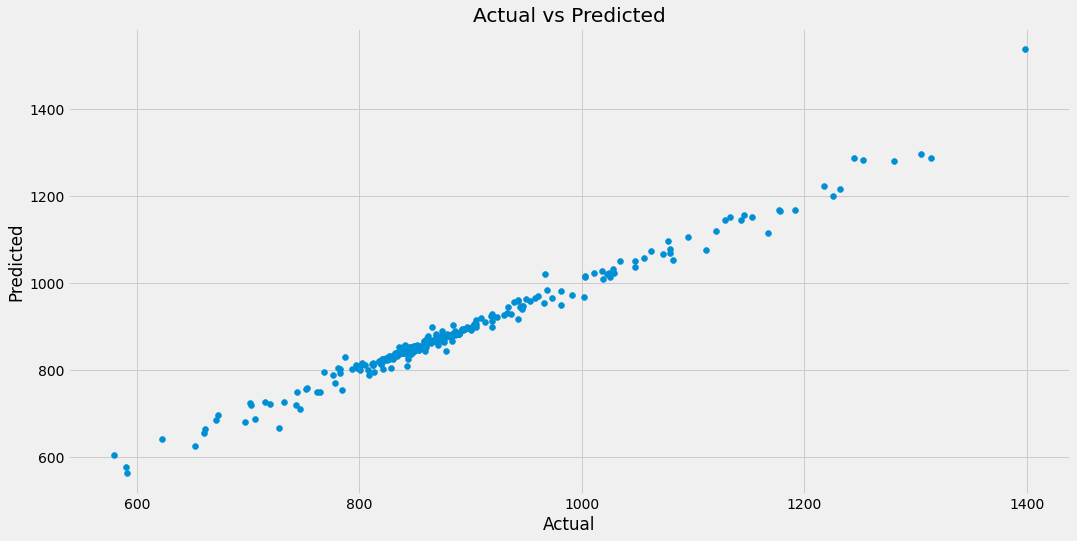

In [166]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o11**


In [167]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','o10']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','o10','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o11'].values

In [168]:
model_o11, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0]]
arr = np.array(arr).reshape((1,-1))
o11 = model_o11.predict(np.array(arr).reshape((1,-1)))
print(o11)

[12:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1167.3335]


In [169]:
r2_score(y_test,y_pred)

0.980086972277368

In [170]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 279.04
RMSE: 16.70


In [171]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,920,921.633911,-1.633911
1,940,943.758667,-3.758667
2,945,943.755493,1.244507
3,905,909.797729,-4.797729
4,1139,1130.531616,8.468384
...,...,...,...
311,921,921.171692,-0.171692
312,886,886.997742,-0.997742
313,955,949.485535,5.514465
314,858,826.514160,31.485840


In [172]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -230.1361083984375
Maximum:  35.00811767578125
Average:  7.356819828854332
STD:  16.673324933864762


Text(0.5, 1.0, 'Actual vs Predicted')

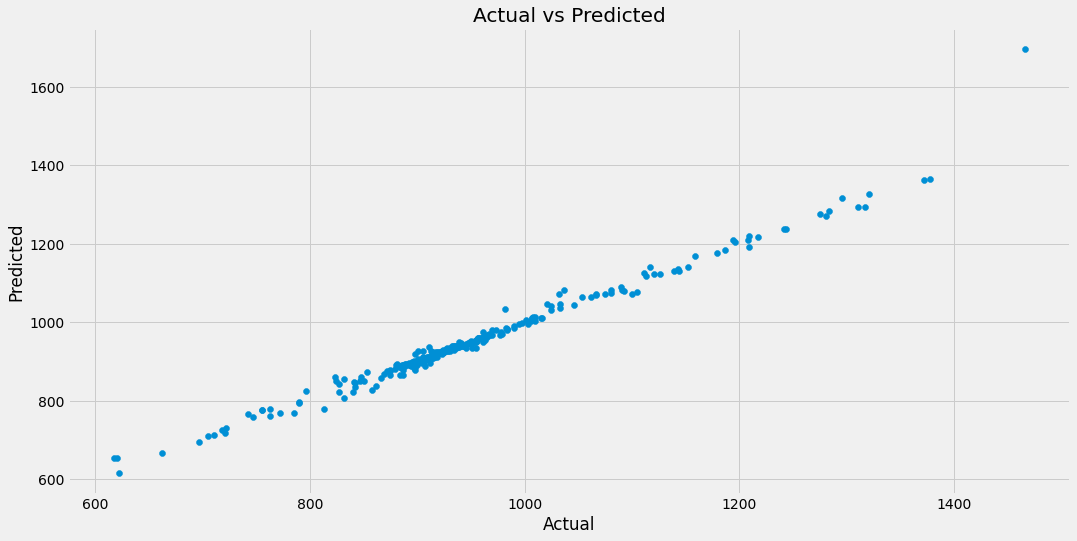

In [173]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o12**


In [174]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','o10','o11']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','o10','o11','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o12'].values

In [175]:
model_o12, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],o11[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],o11[0]]
arr = np.array(arr).reshape((1,-1))
o12 = model_o12.predict(np.array(arr).reshape((1,-1)))
print(o12)

[12:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1197.6729]


In [176]:
r2_score(y_test,y_pred)

0.9919597799719352

In [177]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 120.05
RMSE: 10.96


In [178]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,968,963.424988,4.575012
1,984,981.698303,2.301697
2,993,993.942871,-0.942871
3,951,951.868958,-0.868958
4,1188,1167.575806,20.424194
...,...,...,...
311,969,963.193176,5.806824
312,932,930.422302,1.577698
313,1001,1001.710022,-0.710022
314,890,884.216614,5.783386


In [179]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -44.80169677734375
Maximum:  58.45367431640625
Average:  6.794011562685423
STD:  10.962746174833999


Text(0.5, 1.0, 'Actual vs Predicted')

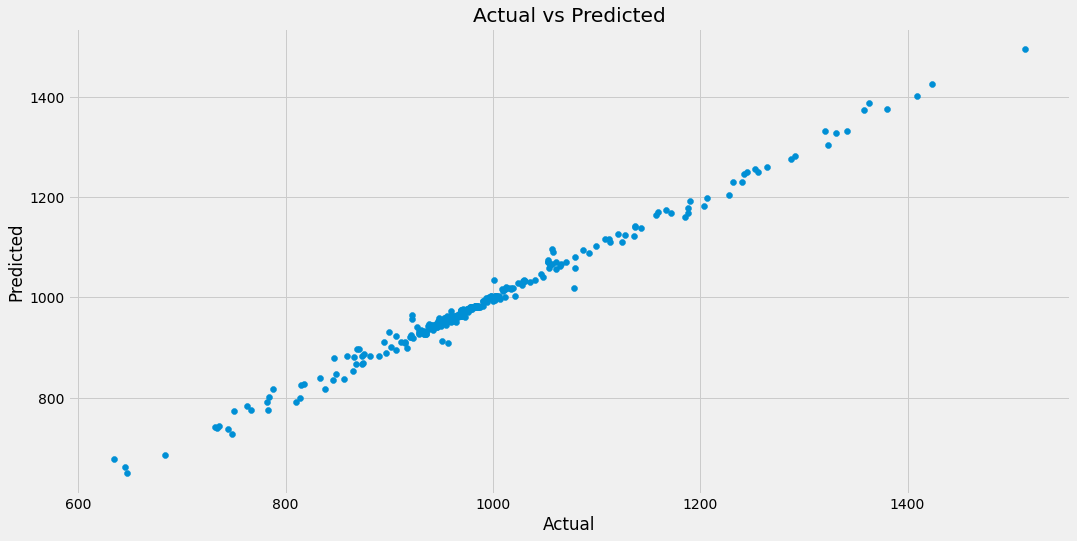

In [180]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**station o13**


In [181]:
#x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','o10','o11','o12']].values

#X with dummy weekday
x = dfbus[['Hours','SecMin','Line','o2','o3','o4','o5','o6','o7','o8','o9','o10','o11','o12','Sun','Mon','Tue','Wed','Thu']].values
y = dfbus['o13'].values

In [182]:
model_o13, y_test, y_pred = model(x,y)
arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],o11[0],o12[0],weekDay[0],weekDay[1],weekDay[2],weekDay[3],weekDay[4]]
#arr = [hour,minSec,line,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],o11[0],o12[0]]
arr = np.array(arr).reshape((1,-1))
o13 = model_o13.predict(np.array(arr).reshape((1,-1)))
print(o13)

[12:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1268.8263]


In [183]:
r2_score(y_test,y_pred)

0.9746086206739885

In [184]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 412.48
RMSE: 20.31


In [185]:
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diff':y_test-y_pred})
pred_y_df

,Actual,Predicted,Diff
0,1022,1016.294678,5.705322
1,1029,1034.700195,-5.700195
2,1043,1043.375366,-0.375366
3,997,1003.336731,-6.336731
4,1251,1239.203613,11.796387
...,...,...,...
311,1023,1015.087341,7.912659
312,981,976.474121,4.525879
313,1047,1050.569702,-3.569702
314,897,915.369568,-18.369568


In [186]:
print('Minimum: ',pred_y_df['Diff'].min())
print('Maximum: ',pred_y_df['Diff'].max())
print('Average: ',np.abs(pred_y_df['Diff']).mean())
print('STD: ',pred_y_df['Diff'].std())

Minimum:  -227.5035400390625
Maximum:  64.419189453125
Average:  10.412252112279964
STD:  20.222593405229556


Text(0.5, 1.0, 'Actual vs Predicted')

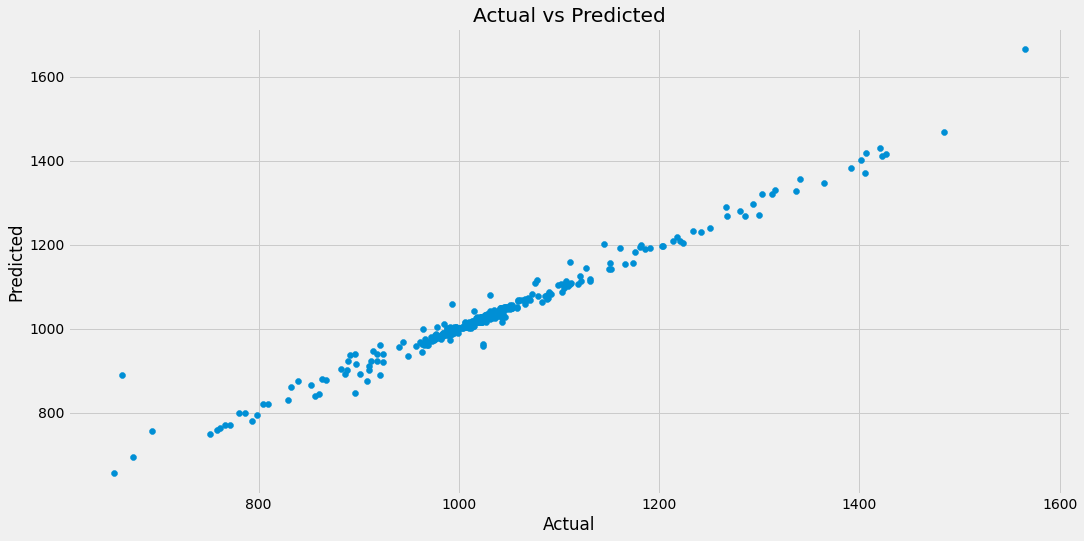

In [187]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

#Final result, Real Times vs Predicted Times

In [188]:
#real data with weekday, in our example Tuesday
#dfbus.loc[(dfbus['Hours'] == 16) & (dfbus['SecMin'] == 45*60) & (dfbus['Tue']==1)]
#dfbus.loc[(dfbus['Hours'] == 11) & (dfbus['SecMin'] == 25*60) & (dfbus['Tue']==1)]

In [189]:
#predicted dataframe
dfPredicted = pd.DataFrame(columns=['WeekDay','Hours','Minutes','Line','o2', 'o3', 'o4','o5','o6','o7', 'o8', 'o9','o10','o11','o12','o13'])
dfPredicted = dfPredicted.append({'WeekDay':'Tuesday','Hours':hour,'Minutes':minSec, 'Line':921,
                    'o2': o2[0],
                    'o3': o3[0],
                    'o4': o4[0],
                    'o5': o5[0],
                    'o6': o6[0],
                    'o7': o7[0],
                    'o8': o8[0],
                    'o9': o9[0],
                    'o10': o10[0],
                    'o11': o11[0],
                    'o12': o12[0],
                    'o13': o13[0]},ignore_index=True)
dfPredicted


,WeekDay,Hours,Minutes,Line,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13
0,Tuesday,16,2700,921,256.359314,416.539429,451.463745,628.23407,757.937012,865.563293,937.840454,1031.2229,1106.880493,1167.333496,1197.672852,1268.826294


**Compare data between predicted to real if is it different.**

In [190]:
#Real data converting station times to array (only for specific day, in our example it is Tuesday)
dfDt = dfbus.loc[(dfbus['Hours'] == 16) & (dfbus['SecMin'] == 45*60) & (dfbus['Tue']==1)]
#dfDt = dfbus.loc[(dfbus['Hours'] == 11) & (dfbus['SecMin'] == 25*60) & (dfbus['Tue']==1)]
dfDt.drop('WeekDay', axis='columns', inplace=True)
dfDt.drop('Hours', axis='columns', inplace=True)
dfDt.drop('SecMin', axis='columns', inplace=True)
dfDt.drop('Line', axis='columns', inplace=True)
arr = dfDt.to_numpy()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [191]:
#Real data converting station times to array( for all days in this time, in our example Time is: 16:45)
dfDtAll = dfbus.loc[(dfbus['Hours'] == 16) & (dfbus['SecMin'] == 45*60)]
#dfDtAll = dfbus.loc[(dfbus['Hours'] == 11) & (dfbus['SecMin'] == 25*60)]
dfDtAll.drop('WeekDay', axis='columns', inplace=True)
dfDtAll.drop('Hours', axis='columns', inplace=True)
dfDtAll.drop('SecMin', axis='columns', inplace=True)
dfDtAll.drop('Line', axis='columns', inplace=True)
arrAll = dfDtAll.to_numpy()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [192]:
#Predicted data converting station times to array
dfDt2 = dfPredicted
dfDt2.drop('WeekDay', axis='columns', inplace=True)
dfDt2.drop('Hours', axis='columns', inplace=True)
dfDt2.drop('Minutes', axis='columns', inplace=True)
dfDt2.drop('Line', axis='columns', inplace=True)
arr2 = dfDt2.to_numpy()

In [193]:
#Checking the difference between predicted to real data, and print percent accuracy for 
#specific day in our example it was Tuesday
#Departure time 16:45 or another example 11:25
cntSame = 0
cntDiff = 0
for i in range(arr.shape[0]):
  cntSame, cntDiff = checkDiff(arr2[0],arr[i],cntSame,cntDiff)
print("The accuracy of the same data:",cntSame/arr.shape[0]*100)
print("The accuracy of the different data:",cntDiff/arr.shape[0]*100)

Statistics=60.000, p=0.033
Statistics=66.000, p=0.058
Statistics=60.000, p=0.033
Statistics=65.000, p=0.053
Statistics=66.000, p=0.058
Statistics=67.000, p=0.063
Statistics=65.000, p=0.053
Statistics=63.000, p=0.044
Statistics=74.000, p=0.111
Statistics=80.000, p=0.170
Statistics=73.000, p=0.103
Statistics=79.000, p=0.159
Statistics=86.000, p=0.246
Statistics=91.000, p=0.321
Statistics=80.000, p=0.170
Statistics=87.000, p=0.260
Statistics=75.000, p=0.120
Statistics=75.000, p=0.120
Statistics=75.000, p=0.120
Statistics=85.000, p=0.232
Statistics=57.000, p=0.024
The accuracy of the same data: 80.95238095238095
The accuracy of the different data: 19.047619047619047


In [194]:
#Checking the difference between predicted to real data, and print percent accuracy for 
#all data in same hour
#Departure time 16:45 or another example 11:25
cntSame = 0
cntDiff = 0
for i in range(arrAll.shape[0]):
  cntSame, cntDiff = checkDiff(arr2[0],arrAll[i],cntSame,cntDiff)
print("The accuracy of the same data:",cntSame/arrAll.shape[0]*100)
print("The accuracy of the different data:",cntDiff/arrAll.shape[0]*100)

Statistics=60.000, p=0.033
Statistics=66.000, p=0.058
Statistics=60.000, p=0.033
Statistics=65.000, p=0.053
Statistics=66.000, p=0.058
Statistics=67.000, p=0.063
Statistics=65.000, p=0.053
Statistics=63.000, p=0.044
Statistics=74.000, p=0.111
Statistics=80.000, p=0.170
Statistics=73.000, p=0.103
Statistics=79.000, p=0.159
Statistics=86.000, p=0.246
Statistics=91.000, p=0.321
Statistics=80.000, p=0.170
Statistics=87.000, p=0.260
Statistics=75.000, p=0.120
Statistics=75.000, p=0.120
Statistics=75.000, p=0.120
Statistics=91.000, p=0.321
Statistics=97.000, p=0.421
Statistics=96.000, p=0.404
Statistics=101.000, p=0.491
Statistics=94.000, p=0.370
Statistics=96.000, p=0.404
Statistics=26.000, p=0.000
Statistics=65.000, p=0.053
Statistics=59.000, p=0.030
Statistics=87.000, p=0.260
Statistics=69.000, p=0.075
Statistics=85.000, p=0.232
Statistics=52.000, p=0.014
Statistics=57.000, p=0.024
The accuracy of the same data: 78.78787878787878
The accuracy of the different data: 21.21212121212121
